In [1]:
import matplotlib.pyplot as plt
import numpy as np

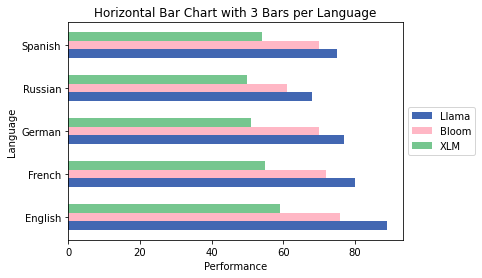

In [2]:
langs = ["English", "French", "German", "Russian", "Spanish"]

llama_perf = [89, 80, 77, 68, 75]
bloom_perf = [76, 72, 70, 61, 70]
xlm_perf = [59, 55, 51, 50, 54]

# Define colors for each bar
colors = ["#4267B2", "#ffb7c5", "#76c68f"]

# Set the width of each bar
bar_width = 0.2

# Create an array for the positions of the bars
index = np.arange(len(langs))

# Plot horizontal bars for each language with separate bars for each model
plt.barh(
    index - bar_width, llama_perf, height=bar_width, color=colors[0], label="Llama"
)
plt.barh(index, bloom_perf, height=bar_width, color=colors[1], label="Bloom")
plt.barh(index + bar_width, xlm_perf, height=bar_width, color=colors[2], label="XLM")

# Set labels and title
plt.xlabel("Performance")
plt.ylabel("Language")
plt.title("Horizontal Bar Chart with 3 Bars per Language")

plt.xlim(0)

# Set y-ticks to display language labels
plt.yticks(index, langs)

# Add legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

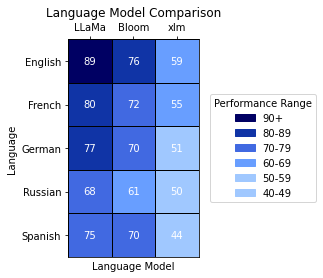

In [77]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

langs = ["English", "French", "German", "Russian", "Spanish"]
llama_perf = [89, 80, 77, 68, 75]
bloom_perf = [76, 72, 70, 61, 70]
xlm_perf = [59, 55, 51, 50, 44]

# Create colormap with custom colors
colors = ["#A0C8FF", "#689EFF", "#4169E1", "#1034A6", "#000063"]
cmap = mcolors.ListedColormap(colors)
bounds = [40, 50, 60, 70, 80, 90, 100]  # Update bounds to include lower bound
norm = plt.Normalize(vmin=min(bounds), vmax=max(bounds))

# Create figure and axes
fig, ax = plt.subplots()

# Create heatmap
im = ax.imshow(np.array([llama_perf, bloom_perf, xlm_perf]).T, cmap=cmap, norm=norm)

# Add solid borders between squares
for i in range(len(langs)):
    for j in range(3):
        ax.add_patch(
            plt.Rectangle(
                (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="black", linewidth=1
            )
        )

# Fill in numerical values in white for all values
for i in range(len(langs)):
    for j in range(3):
        value = np.array([llama_perf, bloom_perf, xlm_perf]).T[i, j]
        if value >= 40:  # Update threshold for text labels
            ax.text(j, i, value, ha="center", va="center", color="white")

# Set ticks and labels for x and y axes
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(len(langs)))
ax.set_xticklabels(["LLaMa", "Bloom", "xlm"])
ax.set_yticklabels(langs)
ax.xaxis.tick_top()  # Move x-axis ticks to the top

# Reverse the order of legend labels and handles
legend_labels = ["40-49", "50-59", "60-69", "70-79", "80-89", "90+"][
    ::-1
]  # Update legend labels and reverse order
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=cmap(norm(bounds[i])))
    for i in range(len(legend_labels))
][
    ::-1
]  # Update legend handles and reverse order

# Add legend
ax.legend(
    legend_handles,
    legend_labels,
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    title="Performance Range",
)
ax.get_legend().get_title().set_fontsize("10")

# Set title and labels for the plot
plt.title("Language Model Comparison")
plt.xlabel("Language Model")
plt.ylabel("Language")
plt.show()